Degree: 1, MSE: 6432.622329329323, R²: 0.05710747615693945


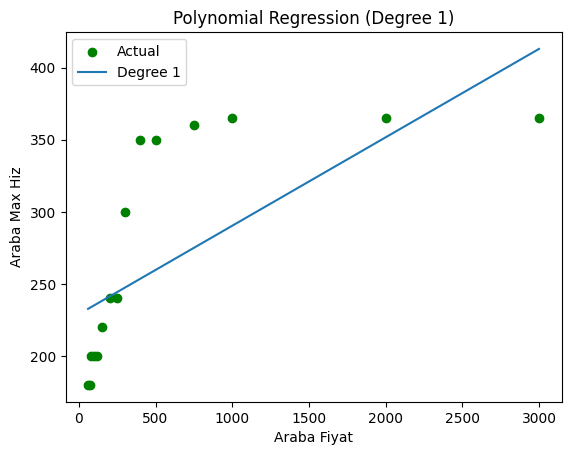

Degree: 2, MSE: 2451.854904775865, R²: 0.6406075872478373


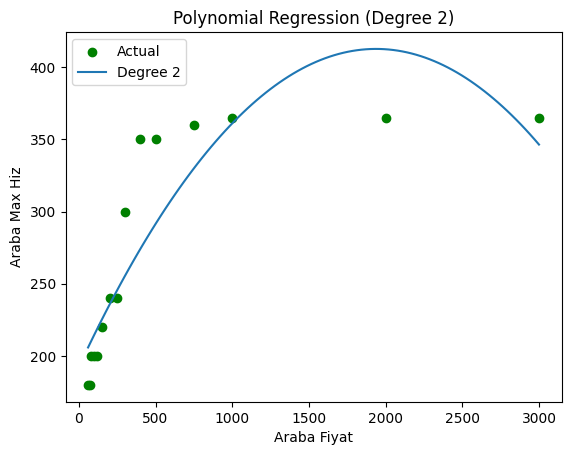

Degree: 3, MSE: 790.0563497392496, R²: 0.8841936946636278


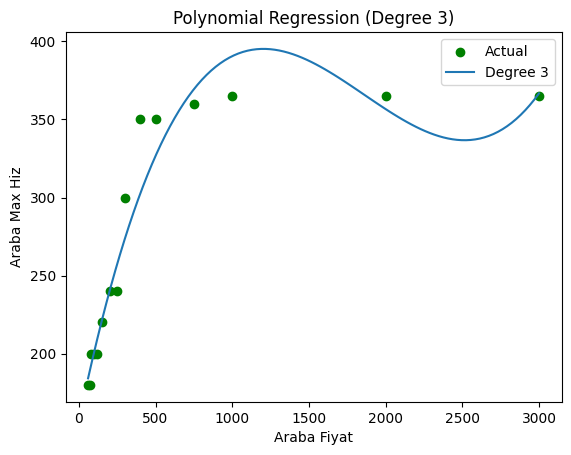

Degree: 4, MSE: 440.84084429818546, R²: 0.9353816352005917


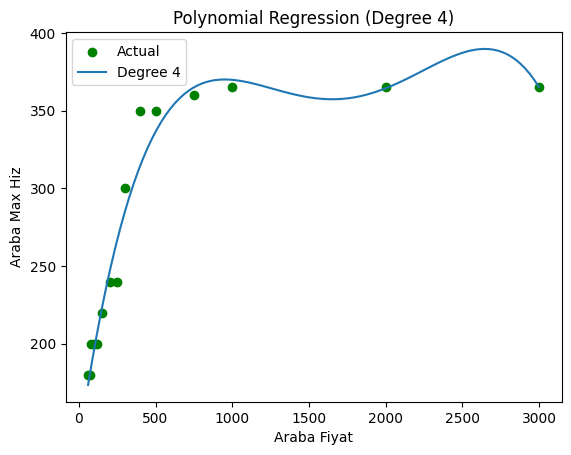

Degree: 5, MSE: 840.9318755939171, R²: 0.8767363700269503


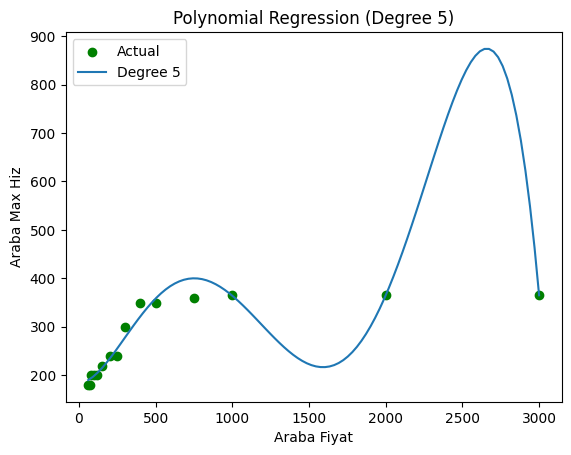

Degree: 6, MSE: 3820.9944057840107, R²: 0.4399193867743306


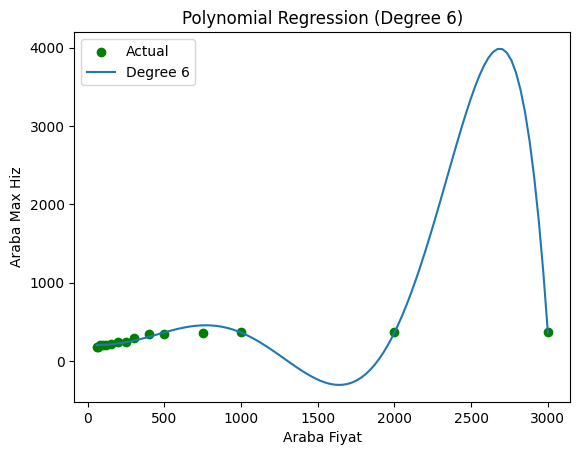

Degree: 7, MSE: 11453.309391552759, R²: -0.6788238521820007


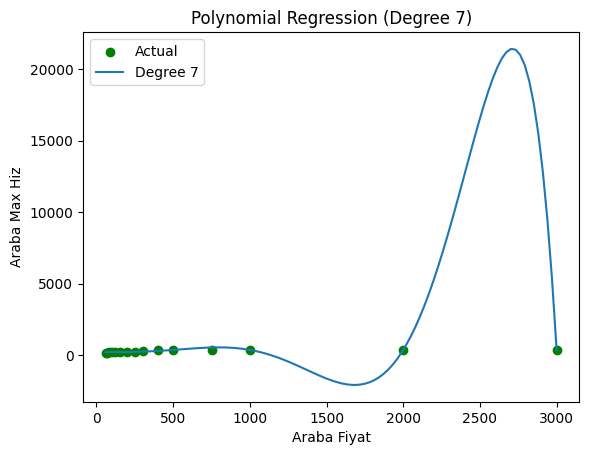

Degree: 8, MSE: 8071.4345767498535, R²: -0.1831093027809234


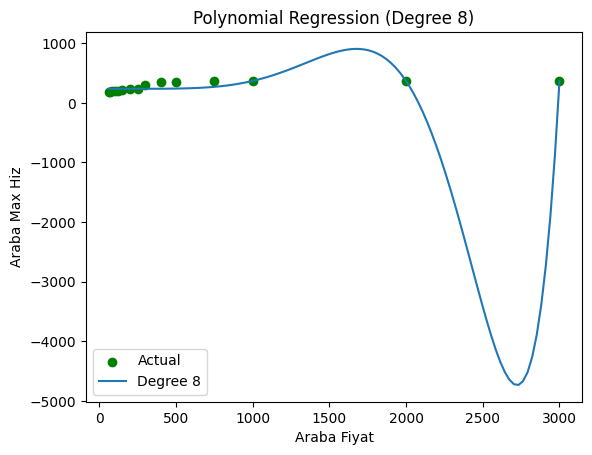

Degree: 9, MSE: 8622.92308044831, R²: -0.2639463798702737


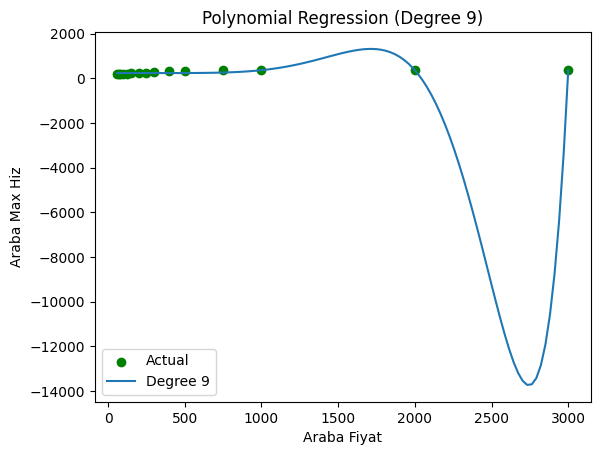

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

data = np.array([
    [60, 180],
    [70, 180],
    [80, 200],
    [100, 200],
    [120, 200],
    [150, 220],
    [200, 240],
    [250, 240],
    [300, 300],
    [400, 350],
    [500, 350],
    [750, 360],
    [1000, 365],
    [2000, 365],
    [3000, 365]
])

df = pd.DataFrame(data, columns=['araba_fiyat', 'araba_max_hiz'])

def activate_polynomial(degree):
    X = df[['araba_fiyat']]
    y = df['araba_max_hiz']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = polynomial_features.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    mse = mean_squared_error(y_test, model.predict(polynomial_features.transform(X_test)))
    r2 = r2_score(y_test, model.predict(polynomial_features.transform(X_test)))
    print(f'Degree: {degree}, MSE: {mse}, R²: {r2}')
    
    plt.figure()
    plt.scatter(X, y, color='green', label='Actual')
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')
    plt.xlabel('Araba Fiyat')
    plt.ylabel('Araba Max Hiz')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

for degree in range(1, 10):
    activate_polynomial(degree)